# State Maker for N-qubits

We construct a 9-qubit ($N=9$) circuit generate any desired state $| \psi_{out} > \sum_{x=0}^{2^9-1} a_x | x>$. The coeficients $a_x$ are real because we only care about the amplitudes. Our goal is to get a given probability distribution for measured state $x$ descrived by $\{ |a_x|^2\}$.

For that we will use $N-1=8$ gates before $N-1=8$ $\text{CNOT}$ gates to control the entanglement between qubits. Then we perform $N=9$ gates to tune the final state.

In [2]:
from qiskit import *
import numpy as np

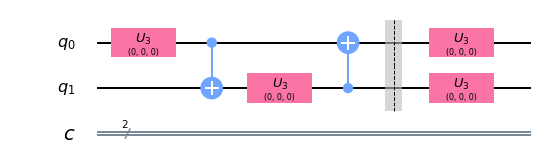

In [4]:
N = 2

thetas = np.zeros((N,2))

circuit = QuantumCircuit(N, N)

## ENTANGLEMENT PHASE
for i in range(N):
    circuit.u3(thetas[i, 0], 0, 0, i)
    if i != N-1:
        circuit.cx(i, i+1)
    else:
        circuit.cx(i, 0)

circuit.barrier()

## STATE TUNING PHASE
for i in range(N):
    circuit.u3(thetas[i,1], 0, 0, i)
    
%matplotlib inline
circuit.draw(output='mpl', filename='2_qbit_circuit.png')